## Çoklu Doğrusal Regresyon Nedir?

Çoklu doğrusal regresyon, bir bağımlı değişkenin (`y`) birden fazla bağımsız değişken (`x1`, `x2`, `x3`, ...) tarafından açıklandığı istatistiksel bir modeldir. Bu model, bağımlı değişken ile birden fazla bağımsız değişken arasındaki ilişkiyi incelemek için kullanılır. Model şu şekilde ifade edilir:

**𝑦 = 𝛽0 + 𝛽1𝑥1 + 𝛽2𝑥2 + 𝛽3𝑥3 + ... + 𝛽𝑛𝑥𝑛 + 𝜖**


Burada:

- `𝑦`: Bağımlı değişken
- `𝑥1`, `𝑥2`, ..., `𝑥𝑛`: Bağımsız değişkenler
- `𝛽0`: Sabit terim (intercept)
- `𝛽1`, `𝛽2`, ..., `𝛽𝑛`: Bağımsız değişkenlerin katsayıları
- `𝜖`: Hata terimi

### Örnek

Örneğin, bir evin satış fiyatını (`y`) tahmin etmek istediğimizi düşünelim. Bu fiyatın, evin alanı (`x1`), oda sayısı (`x2`) ve bulunduğu semtin ortalama gelir düzeyi (`x3`) gibi faktörlere bağlı olduğunu varsayalım.

Modelimiz şu şekilde olabilir:
**Fiyat = 𝛽0 + 𝛽1 ⋅ Alan + 𝛽2 ⋅ Oda Sayısı + 𝛽3 ⋅ Semt Geliri + 𝜖**


Eğer aşağıdaki verilere sahipsek:

| Ev Alanı (m²) | Oda Sayısı | Semt Geliri (TL) | Fiyat (TL) |
|---------------|------------|------------------|------------|
| 100           | 3          | 50000            | 400000     |
| 150           | 4          | 60000            | 550000     |
| 200           | 5          | 70000            | 700000     |
| 120           | 3          | 55000            | 450000     |

Bu verilerle, çoklu doğrusal regresyon kullanarak katsayıları (`𝛽0`, `𝛽1`, `𝛽2`, `𝛽3`) tahmin edebiliriz. Örneğin, modelimizi eğittiğimizde şu sonuçları elde ettiğimizi varsayalım:

**Fiyat = 50000 + 2000 ⋅ Alan + 25000 ⋅ Oda Sayısı + 1.5 ⋅ Semt Geliri**


Bu durumda, 160 m² alanı, 4 odası ve semt geliri 60000 TL olan bir evin fiyatını şu şekilde tahmin edebiliriz:

Fiyat = 50000 + 2000 ⋅ 160 + 25000 ⋅ 4 + 1.5 ⋅ 60000
= 50000 + 320000 + 100000 + 90000
= 560000


Bu model, bağımlı değişken olan evin fiyatının, bağımsız değişkenler olan alan, oda sayısı ve semt geliri ile nasıl ilişkili olduğunu gösterir.








In [3]:
# Gerekli kütüphaneleri içe aktarın
import pandas as pd
from sklearn.linear_model import LinearRegression

# Örnek veri oluşturun
data = {
    'Alan': [100, 150, 200, 120],
    'Oda_Sayısı': [3, 4, 5, 3],
    'Semt_Geliri': [50000, 60000, 70000, 55000],
    'Fiyat': [400000, 550000, 700000, 450000]
}

# Veri çerçevesi oluşturun
df = pd.DataFrame(data)

# Bağımsız değişkenler (X) ve bağımlı değişken (Y) olarak veriyi ayırın
X = df[['Alan', 'Oda_Sayısı', 'Semt_Geliri']]
y = df['Fiyat']

# Lineer regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X, y)

# Modelin katsayılarını ve sabitini yazdırın
print("Katsayılar (Beta):")
print("𝛽0 (Sabit):", model.intercept_)
print("𝛽1 (Alan):", model.coef_[0])
print("𝛽2 (Oda Sayısı):", model.coef_[1])
print("𝛽3 (Semt Geliri):", model.coef_[2])

# Tahmin yapmak için örnek bir veri oluşturun
ornek_veri = [[160, 4, 60000]]

# Tahmin yapın
tahmin = model.predict(ornek_veri)
print("\nTahmin edilen fiyat:", tahmin[0], "TL")


Katsayılar (Beta):
𝛽0 (Sabit): 393564.3059700127
𝛽1 (Alan): 4950.4946613078355
𝛽2 (Oda Sayısı): 495.05338692192817
𝛽3 (Semt Geliri): -9.801978645231259

Tahmin edilen fiyat: 599504.9466130786 TL


c:\Users\gokha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Analiz Öncesinde Dikkat Edilmesi Gereken Temel Varsayımlar
#### Doğrusallık varsayımı kontrolü:
Doğrusallık varsayımı, istatistiksel modellerin temelinde yer alan önemli bir varsayımdır. Bu varsayım, bağımsız değişkenler ile bağımlı değişken arasındaki ilişkinin doğrusal olduğunu ifade eder. Yani, bağımsız değişkenlerin birim değişimi, bağımlı değişken üzerinde sabit bir oranla değişikliklere neden olur.
Tabloya göre, bir araba satış veri seti düşünelim. 

**Bağımlı değişkenimiz:** `araba fiyatı` olsun ve **bağımsız değişkenlerimiz** `araba` `yaş` ve `kilometresi`  olsun. Doğrusallık varsayımı, araba yaş ve araba kilometresi ile araba fiyatı arasındaki ilişkinin doğrusal olduğunu belirtir.

Öncelikle, doğrusallık varsayımını görsel olarak kontrol edebiliriz. Bu, her bir bağımsız değişkenin (araba yaş ve araba kilometresi) araba fiyatı üzerindeki etkisini gösteren dağılım grafiklerini incelemek anlamına gelir. Grafikler, eğilimin doğrusal olup olmadığını görsel olarak değerlendirmemize yardımcı olacaktır. Eğer grafikler doğrusal bir ilişki gösteriyorsa, doğrusallık varsayımının karşılandığını söyleyebiliriz.

Ayrıca, istatistiksel testlerle de doğrusallık kontrolü yapabiliriz. Örneğin, regresyon analizini gerçekleştirdikten sonra, regresyon katsayılarının anlamlılığını değerlendiren t-testleri kullanabiliriz. Bu testler, bağımsız değişkenlerin bağımlı değişken üzerinde doğrusal bir etkisi olup olmadığını belirlememize yardımcı olur. Eğer bu testler sonucunda katsayılar istatistiksel olarak anlamlı ise, bu doğrusallık varsayımının karşılandığını gösterir.

Özetle, doğrusallık varsayımını kontrol etmek için hem görsel inceleme yöntemlerini hem de istatistiksel testleri kullanabiliriz. Bu kontrol, modelin doğru ve güvenilir sonuçlar üretmesini sağlar.



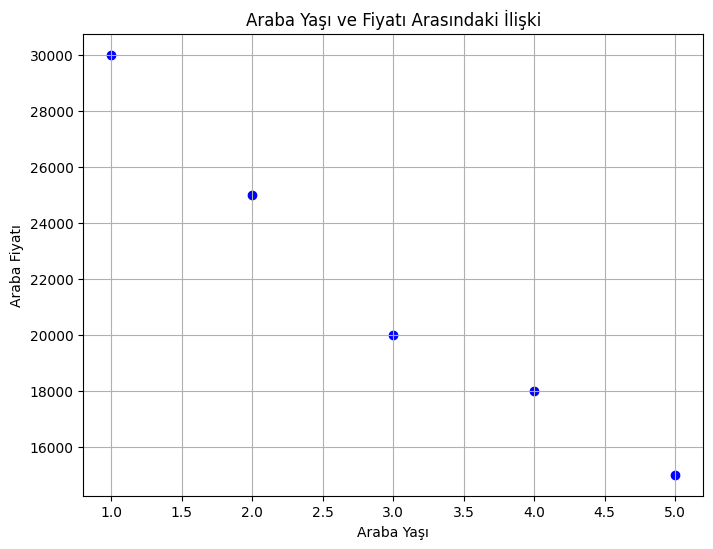

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Varsayılan araba fiyatı veri seti
araba_yasi = np.array([1, 2, 3, 4, 5])
araba_fiyati = np.array([30000, 25000, 20000, 18000, 15000])

# Dağılım grafiği çizimi
plt.figure(figsize=(8, 6))
plt.scatter(araba_yasi, araba_fiyati, color='blue')
plt.title('Araba Yaşı ve Fiyatı Arasındaki İlişki')
plt.xlabel('Araba Yaşı')
plt.ylabel('Araba Fiyatı')
plt.grid(True)
plt.show()